In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import detrend, butter, filtfilt
from scipy.signal import find_peaks


In [85]:
# load data 
df = pd.read_csv('signal.csv')
df_raw = df.copy()
df.head()

,Unnamed: 0,Time,Noisy_Trended_Signal
0,0,0.00000,-0.212277
1,1,0.01001,0.249596
2,2,0.02002,0.507517
3,3,0.03003,0.836112
4,4,0.04004,1.088553


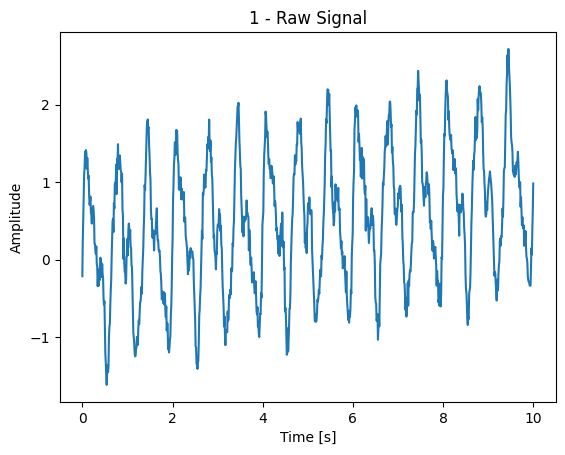

In [86]:
# plot raw signal 
signal = df['Noisy_Trended_Signal']
time = df['Time']
plt.plot(time, signal)
plt.title("1 - Raw Signal")
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

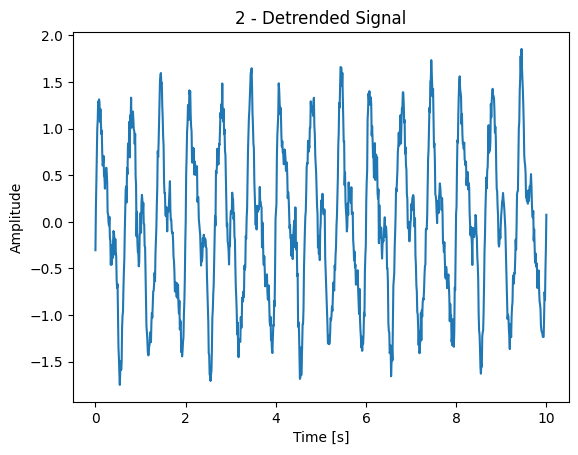

In [87]:
# detrend
detrended_signal = detrend(signal)
plt.plot(time, detrended_signal)
plt.title("2 - Detrended Signal")
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

In [88]:
def butter_lowpass_filter(data, cutoff, fs, order=5):
    """
    Applies a Butterworth low-pass filter to the input signal.

    Parameters:
    - data: The input signal to be filtered.
    - cutoff: The cutoff frequency for the filter.
    - fs: The sampling rate of the signal.
    - order: The order of the filter, determining the sharpness of the cutoff.

    Returns:
    - The filtered signal, where high-frequency noise above the cutoff is attenuated.
    """
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

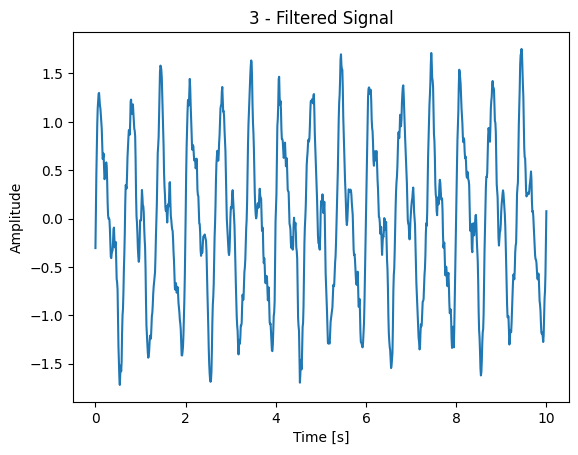

In [89]:
# low-pass filter to remove high-frequency noise
cutoff_frequency = 30  
sampling_rate = 1 / np.mean(np.diff(time)) 
filtered_signal = butter_lowpass_filter(detrended_signal, cutoff_frequency, sampling_rate)
plt.plot(time, filtered_signal)
plt.title("3 - Filtered Signal")
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

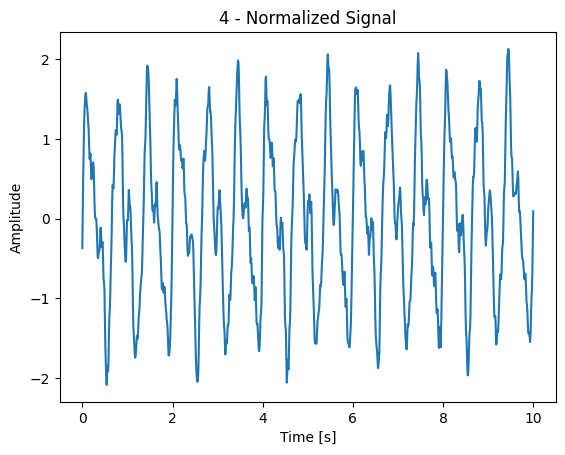

In [90]:
# normalize  
normalized_signal = (filtered_signal - np.mean(filtered_signal)) / np.std(filtered_signal)
plt.plot(time, normalized_signal)
plt.title("4 - Normalized Signal")
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

In [91]:
clean_signal = normalized_signal

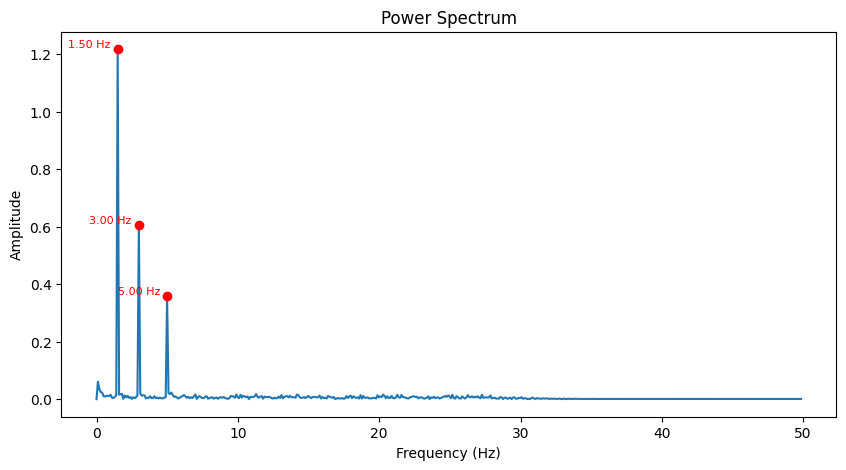

In [93]:
# FFT
N = len(clean_signal)
T = time[1] - time[0] 
yf = fft(clean_signal)
xf = fftfreq(N, T)[:N//2]
yf_norm = 2.0/N * np.abs(yf[0:N//2])
plt.figure(figsize=(10, 5))
plt.plot(xf, yf_norm)
plt.title('Power Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

peaks, _ = find_peaks(yf_norm, height=0.2)
for peak in peaks:
    plt.plot(xf[peak], yf_norm[peak], "ro")  # Mark the peak
    plt.text(xf[peak], yf_norm[peak], f"{xf[peak]:.2f} Hz  ", 
             ha="right", va="bottom", fontsize=8, color="red")
plt.show()

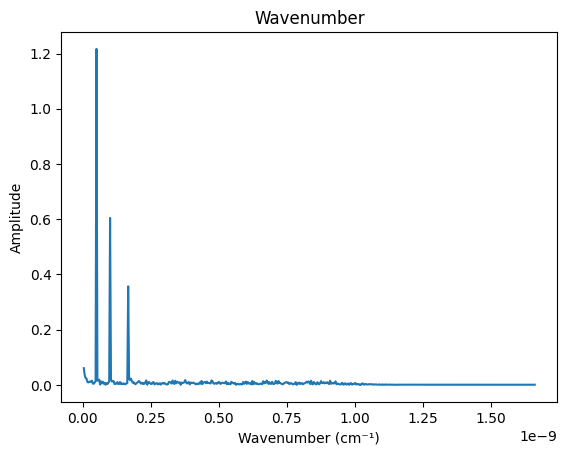

In [94]:
c = 3e8 

# convert frequency (in Hz) to wavelength (in meters)
wavelength = c / xf[1:]

# convert wavelength (in meters) to wavenumber (in cm^-1)
wavenumber = 1 / wavelength * 1e-2 

plt.plot(wavenumber, yf_norm[1:])
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Amplitude')
plt.title('Wavenumber')
plt.show()

In [95]:
# new features 
peak_frequency = xf[np.argmax(yf)]
max_amplitude = np.max(yf)
signal_energy = np.sum(np.square(clean_signal))
all_peaks = peaks

IndexError: index 970 is out of bounds for axis 0 with size 500